# House Prices Prediction

My attempt to use different ML Regression Algorithms and predict house prices. The data was taken from kaggle. 

In [232]:
import pandas as pd
import numpy as np
df_train= pd.read_csv(r'C:\Users\mssre\Desktop\Data\capstone 1\train.csv')
df_test= pd.read_csv(r'C:\Users\mssre\Desktop\Data\capstone 1\test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Dealing with missing values

In [234]:
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace=True)
df_train['MasVnrArea'].isna().sum()

0

In [235]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df_train['Street']= enc.fit_transform(df_train['Street'])
df_train['SaleType']= enc.fit_transform(df_train['SaleType'])
df_train['SaleCondition']= enc.fit_transform(df_train['SaleCondition'])

In [236]:
x= df_train[['LotArea','OverallQual','OverallCond','MasVnrArea','GrLivArea','GarageArea','PoolArea','Street','SaleType','SaleCondition']]
y= df_train['SalePrice']

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.5,random_state=42)

### Linear Regression

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred1= reg.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_pred1)))
m.r2_score(y_test,y_pred1)

41324.1748390518


0.7495181463519176

### Lasso Regression

In [239]:
from sklearn.linear_model import Lasso
ls= Lasso()
ls.fit(x_train,y_train)
y_pred2= ls.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_pred2)))
m.r2_score(y_test,y_pred2)

41322.03999640192


0.7495440259022642

### Decision Tree

In [240]:
from sklearn.tree import DecisionTreeRegressor
dc= DecisionTreeRegressor(max_depth=5)
dc.fit(x_train,y_train)
y_pred3= dc.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_pred3)))
m.r2_score(y_test,y_pred3)

39994.92732748397


0.7653731489974696

### Random Forest

In [241]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=100,max_depth=10)
rf.fit(x_train,y_train)
y_pred4= rf.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_pred4)))
m.r2_score(y_test,y_pred4)

34981.350639059565


0.8205096785913522

### SVM

In [242]:
from sklearn.svm import SVR
sv= SVR()
sv.fit(x_train,y_train)
y_pred5= sv.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_pred5)))
m.r2_score(y_test,y_pred5)

84918.65482676572


-0.057728240634771666

### Observations

We implemented 5 different regression algorithms here. For evaluating which one did well we are considering RMSE and R2 Score.

- We can ruleout the SVM with negative R2 score and large error
- Next, we can rule out Lasso and Linear Regression where we got almost similar values.
- Now in between Decision tree and Random Forest. Random Forest performed a little well and implementing it would not lead to overfitting.

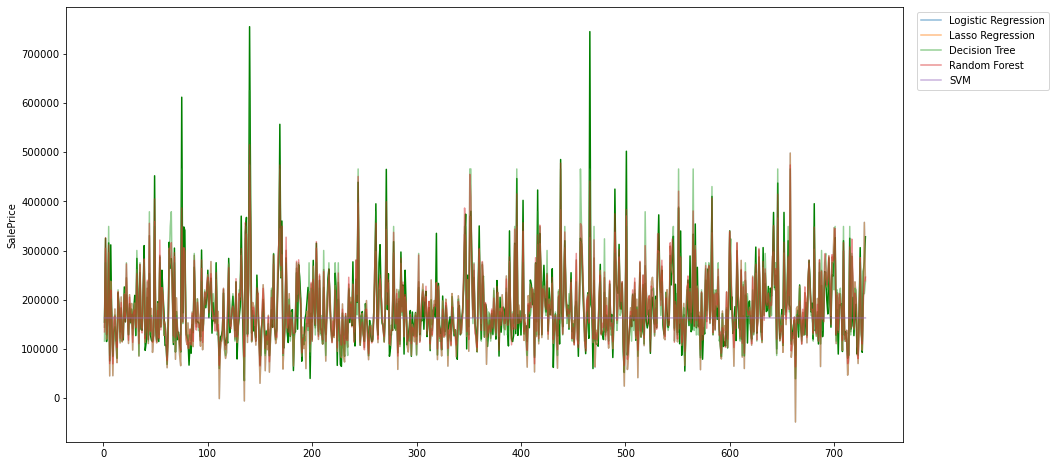

In [243]:
a= np.arange(1,731,1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x=a,y=y_test,color='g')
sns.lineplot(x=a,y=y_pred1,label='Logistic Regression',alpha=0.5)
sns.lineplot(x=a,y=y_pred2,label='Lasso Regression',alpha=0.5)
sns.lineplot(x=a,y=y_pred3,label='Decision Tree',alpha=0.5)
sns.lineplot(x=a,y=y_pred4,label='Random Forest',alpha=0.5)
sns.lineplot(x=a,y=y_pred5,label='SVM',alpha=0.5)
plt.legend(bbox_to_anchor=(1.18,1))

### Hyper Parameter Tuning for Optimizing Random Forests

Since, we have chosen implementing Random forest. For even better performance we could implement GridSearchCV and find out best parameters.

We will fine tune our random forest model using grid search technique. Where we will need to tell which hyper parameters we want to experiment and what values to try out, and grid search technique will evaluate all the possible combination of hyper parameters values, using cross validation.

In [244]:
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3,5,10,15,20,25,30,50], 'max_features': [2,4,5,10,12,15]},
       {'bootstrap': [False], 'n_estimators': [3,5,10,15,20,25,30,50], 'max_features': [2,4,5,10,12,15]}]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [245]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=100,max_features=4,n_estimators=50,max_depth=10)
rf.fit(x_train,y_train)
y_preds= rf.predict(x_test)
print(np.sqrt(m.mean_squared_error(y_test,y_preds)))
m.r2_score(y_test,y_preds)

34110.8298878328


0.8293318586040913

Above,we can see that there's little improvement with the error and R2 score. And we'll be using the same parameters for final model.

Now, we can choose important features of the model and only use them for the final model

In [246]:
grid_search.best_estimator_.feature_importances_

array([0.0977502 , 0.40135584, 0.0199605 , 0.04033366, 0.23096036,
       0.1669663 , 0.00471139, 0.0004509 , 0.01025315, 0.02725772])

In [247]:
imp= pd.DataFrame({'fea':x_train.columns,'imp':grid_search.best_estimator_.feature_importances_})
imp.sort_values('imp',ascending=False)

,fea,imp
1,OverallQual,0.401356
4,GrLivArea,0.230960
5,GarageArea,0.166966
0,LotArea,0.097750
3,MasVnrArea,0.040334
9,SaleCondition,0.027258
2,OverallCond,0.019961
8,SaleType,0.010253
6,PoolArea,0.004711
7,Street,0.000451


This step allows us the opportunity to understand which feature are most important and which are of low importance, i.e street that can be dropped. As we seen earlier, OverallQual is top feature for the model.

### Implementing final Model

Finally, its time to evaluate the random forest model on the test set and deploy it into production.

In [248]:
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(),inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].mean(),inplace=True)
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df_test['Street']= enc.fit_transform(df_test['Street'])
df_test['SaleType']= enc.fit_transform(df_test['SaleType'])
df_test['SaleCondition']= enc.fit_transform(df_test['SaleCondition'])

In [249]:
X_train= df_train[['OverallQual','GrLivArea','GarageArea','LotArea','MasVnrArea','SaleCondition','OverallCond']]
Y_train= df_train['SalePrice']
X_test= df_test[['OverallQual','GrLivArea','GarageArea','LotArea','MasVnrArea','SaleCondition','OverallCond']]

In [250]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(random_state=100,max_features=4,n_estimators=50,max_depth=10)
rfr.fit(X_train,Y_train)
Y_pred= rfr.predict(X_test)

In [251]:
final_df= pd.DataFrame({'Id':df_test['Id'],'Final Price':Y_pred})

In [252]:
final_df

,Id,Final Price
0,1461,135827.723220
1,1462,155422.870181
2,1463,155721.450880
3,1464,177064.414080
4,1465,206699.738792
...,...,...
1454,2915,83941.583157
1455,2916,92423.738857
1456,2917,151632.061516
1457,2918,112616.278415
